# # CIFAR10 dataset classification Model 비교

refered https://www.cs.toronto.edu/~kriz/cifar.html


In [48]:
# 기본 Library 선언 및 Tensorflow 버전 확인
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.2.0


In [4]:
# Visualize training results
# 네트워크 학습후 결과를 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [5]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()    

print("cifar10 train : ", train_images.shape)
print("cifar10 test  : ", test_images.shape)

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


170500096/170498071 [==============================] - 11s 0us/step
cifar10 train :  (50000, 32, 32, 3)
cifar10 test  :  (10000, 32, 32, 3)


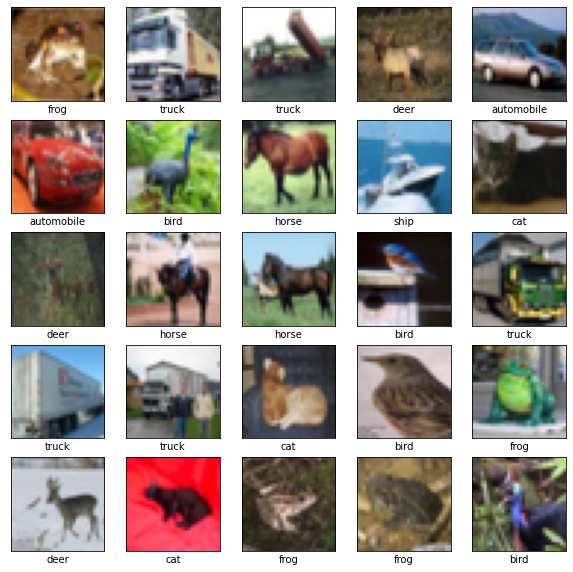

In [6]:
#
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

In [7]:
#
train_x = train_images
test_x = test_images
train_y = train_labels
test_y = test_labels

print("train : ", train_x.shape)
print("test  : ", test_y.shape)

train :  (50000, 32, 32, 3)
test  :  (10000, 1)


## model1: conv layer1 (3X3, 32), conv layer2 (3X3, 64)  epoch 5, FC(512), dropout(0.2)

In [8]:
# model 1 hyper parameter
learning_rate = 0.01
epochs = 5
batch_size = 128

IMG_HEIGHT = 32
IMG_WIDTH = 32

In [9]:
#Create the model

model1 = Sequential([
    Conv2D(32, 3, activation='relu', kernel_initializer='he_normal', padding='same', 
           input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

# compile the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [10]:
#Train the model
history1 = model1.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=batch_size)

Epoch 1/5
391/391 [==============================] - 5s 13ms/step - loss: 1.4309 - accuracy: 0.4908 - val_loss: 1.1195 - val_accuracy: 0.6003
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 1.0223 - accuracy: 0.6404 - val_loss: 0.9384 - val_accuracy: 0.6708
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 0.8664 - accuracy: 0.6977 - val_loss: 0.8857 - val_accuracy: 0.6962
Epoch 4/5
391/391 [==============================] - 5s 13ms/step - loss: 0.7588 - accuracy: 0.7349 - val_loss: 0.8380 - val_accuracy: 0.7090
Epoch 5/5
391/391 [==============================] - 5s 13ms/step - loss: 0.6629 - accuracy: 0.7688 - val_loss: 0.8092 - val_accuracy: 0.7253


In [11]:
loss, acc = model1.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

loss= 0.8092233538627625
acc= 0.7253000140190125


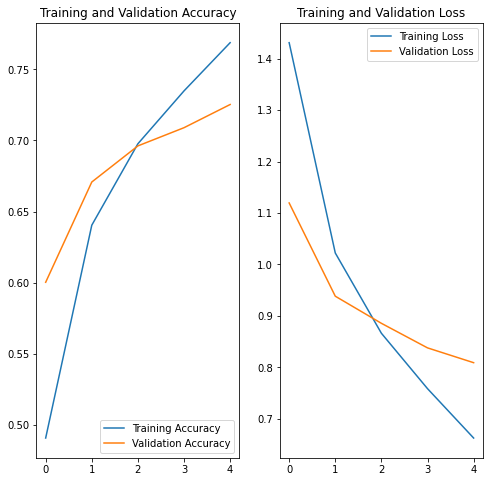

Text(0.5, 1.0, 'Model1')

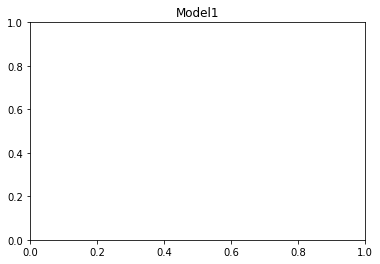

In [12]:
#Visualize the model
plot_history(history1)


## Model2 =  Model1  + dropout + epoche 15

In [ ]:
# model 1 hyper parameter
learning_rate = 0.01
epochs = 15
batch_size = 128

In [24]:
model2 = Sequential([
    Conv2D(32, 3, activation='relu', kernel_initializer='he_normal', padding='same', 
           input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

# compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [25]:
#Train the model
history2 = model2.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=batch_size)

Epoch 1/15
250/250 [==============================] - 5s 20ms/step - loss: 1.8321 - accuracy: 0.3492 - val_loss: 1.4304 - val_accuracy: 0.4903
Epoch 2/15
250/250 [==============================] - 5s 20ms/step - loss: 1.3127 - accuracy: 0.5308 - val_loss: 1.1522 - val_accuracy: 0.5986
Epoch 3/15
250/250 [==============================] - 5s 19ms/step - loss: 1.1361 - accuracy: 0.5967 - val_loss: 1.0213 - val_accuracy: 0.6473
Epoch 4/15
250/250 [==============================] - 5s 19ms/step - loss: 1.0264 - accuracy: 0.6378 - val_loss: 0.9725 - val_accuracy: 0.6587
Epoch 5/15
250/250 [==============================] - 5s 19ms/step - loss: 0.9457 - accuracy: 0.6672 - val_loss: 0.9089 - val_accuracy: 0.6852
Epoch 6/15
250/250 [==============================] - 5s 19ms/step - loss: 0.8710 - accuracy: 0.6945 - val_loss: 0.8655 - val_accuracy: 0.7004
Epoch 7/15
250/250 [==============================] - 5s 19ms/step - loss: 0.8055 - accuracy: 0.7164 - val_loss: 0.8288 - val_accuracy: 0.7163

In [26]:
loss, acc = model2.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

loss= 0.7681891322135925
acc= 0.7465000152587891


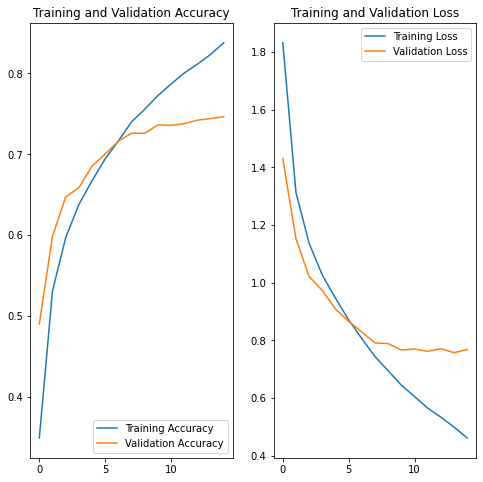

In [27]:
#Visualize the model
plot_history(history2)


## Model3 = Model2 + conv layer3

In [28]:
# model 3 hyper parameter
learning_rate = 0.01
epochs = 15
batch_size = 200

In [30]:
model3 = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, 3, padding='same', activation='relu',kernel_initializer='he_uniform'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(128, 3, padding='same', activation='relu',kernel_initializer='he_uniform'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# compile the model
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model3.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)        

In [31]:
#Train the model
history3 = model3.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs)

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6312 - accuracy: 0.4000 - val_loss: 1.2437 - val_accuracy: 0.5556
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2417 - accuracy: 0.5579 - val_loss: 1.0512 - val_accuracy: 0.6288
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0891 - accuracy: 0.6140 - val_loss: 0.9074 - val_accuracy: 0.6853
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0055 - accuracy: 0.6474 - val_loss: 0.8554 - val_accuracy: 0.7047
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9432 - accuracy: 0.6687 - val_loss: 0.8162 - val_accuracy: 0.7137
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8950 - accuracy: 0.6843 - val_loss: 0.7724 - val_accuracy: 0.7280
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8688 - accuracy: 0.6976 - val_loss: 0.7650 - val_ac

In [32]:
loss, acc = model3.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

loss= 0.7409620881080627
acc= 0.7477999925613403


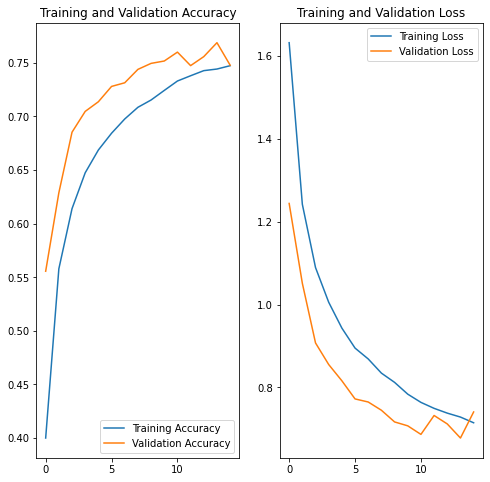

In [33]:
#Visualize the model
plot_history(history3)

## Model4 = conv32 *2, maxpooling, conv64 *2, maxpooling, conv128 *1, FC(512), 

In [38]:
model4 = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# compile the model
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model4.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)         

In [39]:
#Train the model
history4 = model4.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs)

Epoch 1/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5616 - accuracy: 0.4246 - val_loss: 1.1643 - val_accuracy: 0.5776
Epoch 2/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1404 - accuracy: 0.5926 - val_loss: 0.9205 - val_accuracy: 0.6738
Epoch 3/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9966 - accuracy: 0.6477 - val_loss: 0.8504 - val_accuracy: 0.7007
Epoch 4/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8976 - accuracy: 0.6835 - val_loss: 0.8058 - val_accuracy: 0.7217
Epoch 5/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8388 - accuracy: 0.7065 - val_loss: 0.8022 - val_accuracy: 0.7220
Epoch 6/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7975 - accuracy: 0.7213 - val_loss: 0.7109 - val_accuracy: 0.7528
Epoch 7/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7631 - accuracy: 0.7326 - val_loss: 0.7132 -

In [40]:
loss, acc = model4.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

loss= 0.6472293138504028
acc= 0.7828999757766724


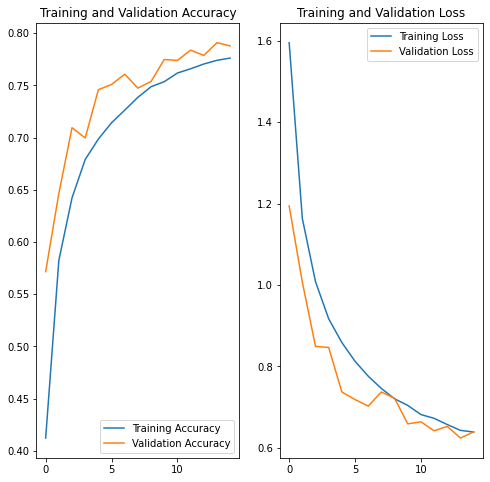

In [37]:
#Visualize the model
plot_history(history4)

Model5 = Model4 + kernel_init(He)

In [41]:
# hyper parameter
learning_rate = 0.001
epochs = 20
batch_size = 100

IMG_HEIGHT = 32
IMG_WIDTH = 32

In [50]:
model5 = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, 3, padding='same', activation='relu',kernel_initializer='he_uniform'),
    Conv2D(64, 3, padding='same', activation='relu',kernel_initializer='he_uniform'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(128, 3, padding='same', activation='relu',kernel_initializer='he_uniform'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# compile the model
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model5.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 64)         

In [51]:
#Train the model
history5 = model5.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs)

Epoch 1/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5910 - accuracy: 0.4160 - val_loss: 1.2312 - val_accuracy: 0.5647
Epoch 2/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1745 - accuracy: 0.5868 - val_loss: 1.0170 - val_accuracy: 0.6545
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0265 - accuracy: 0.6484 - val_loss: 0.8893 - val_accuracy: 0.7014
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9425 - accuracy: 0.6824 - val_loss: 0.8579 - val_accuracy: 0.7135
Epoch 5/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8835 - accuracy: 0.7050 - val_loss: 0.7936 - val_accuracy: 0.7397
Epoch 6/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8482 - accuracy: 0.7209 - val_loss: 0.8233 - val_accuracy: 0.7320
Epoch 7/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8067 - accuracy: 0.7372 - val_loss: 0.7427 -

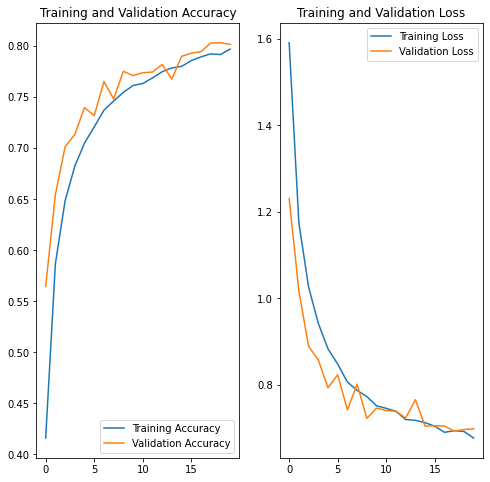

In [52]:
#Visualize the model
plot_history(history5)